<a href="https://colab.research.google.com/github/saghar-trade/Time-series/blob/main/perrin_freres_monthly_champagne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import mean_squared_error , r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [8]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/perrin-freres-monthly-champagne-.csv' , index_col='Month', skipfooter=2 , parse_dates=True)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-1407755114.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('/content/drive/MyDrive/perrin-freres-monthly-champagne-.csv' , index_col='Month', skipfooter=2 , parse_dates=True)


,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [9]:
df.columns=['Sales']

<Axes: xlabel='Month', ylabel='Sales'>

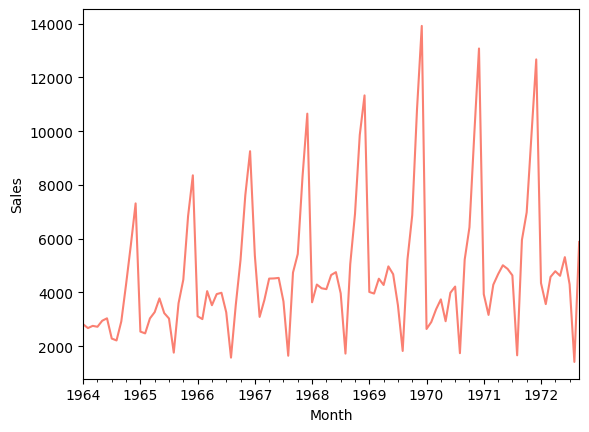

In [12]:
df['Sales'].plot(ylabel='Sales', color='salmon')

In [13]:
df.index.freq='MS'

In [15]:
Ntest=12
train=df.iloc[:-Ntest]
test=df.iloc[-Ntest:]

In [20]:
#bollean series
train_idx=df.index<=train.index[-1]
test_idx=df.index > train.index[-1]

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [18]:
hw=ExponentialSmoothing(
    train['Sales'],
    initialization_method='legacy-heuristic',
    trend='add', seasonal='add', seasonal_periods=12

)
res_hw=hw.fit()


In [22]:
df.loc[train_idx, 'HoltWintersTrain']= res_hw.fittedvalues
df.loc[test_idx, 'HoltWintersTest']= res_hw.forecast(Ntest)

<Axes: xlabel='Month'>

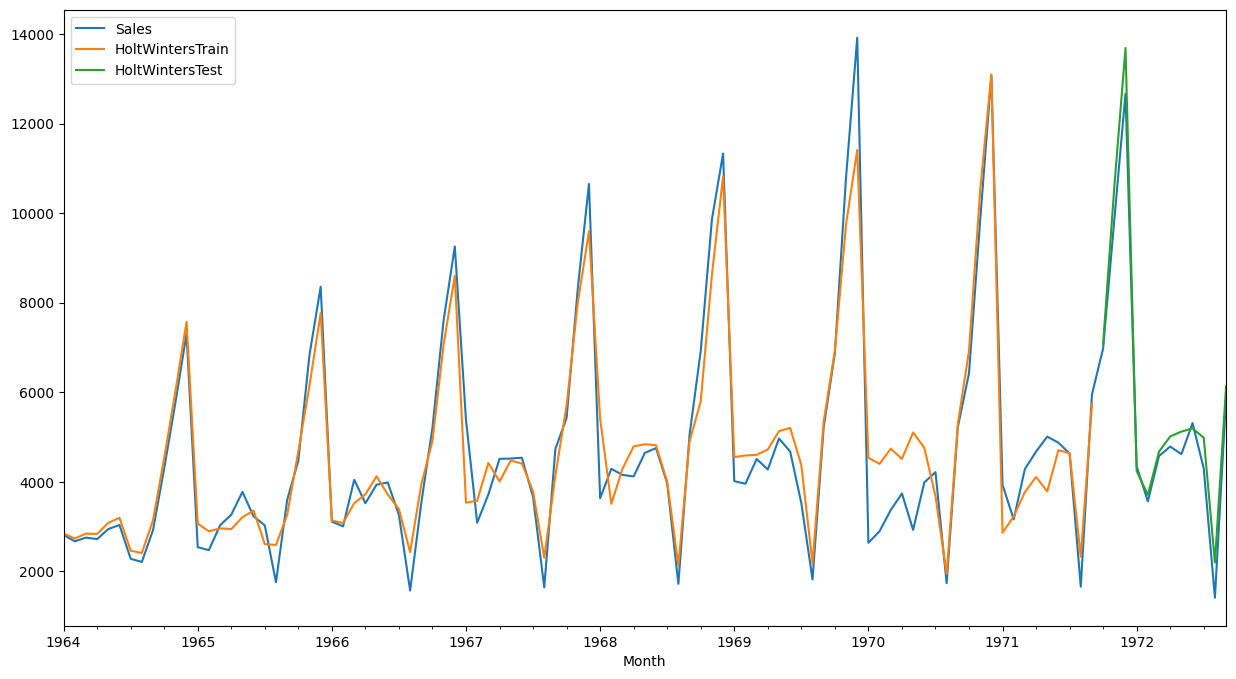

In [24]:
df[['Sales', 'HoltWintersTrain', 'HoltWintersTest' ]].plot(figsize=(15,8))

In [27]:
r2_score(train['Sales'],res_hw.fittedvalues)

0.9170039191592038

In [28]:
r2_score(test['Sales'],res_hw.forecast(Ntest))

0.9681685558801634